 # Exploratory Data Analysis with Pandas


#### Course: Data Visualization
#### Assignment: Homework 2
#### Name: Anush Khachatryan
#### Date: 28.09.25

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparation

In [8]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Datavis2\ai_jobs_with_skills_groups.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title              735 non-null    object 
 1   company                735 non-null    object 
 2   location               735 non-null    object 
 3   rating                 735 non-null    float64
 4   salary_raw             506 non-null    object 
 5   salary_min             506 non-null    float64
 6   salary_max             506 non-null    float64
 7   salary_period          500 non-null    object 
 8   level                  735 non-null    object 
 9   is_manager             735 non-null    bool   
 10  description            735 non-null    object 
 11  skill_1                698 non-null    object 
 12  skill_2                651 non-null    object 
 13  skill_3                586 non-null    object 
 14  skill_4                514 non-null    object 
 15  skill_

In [10]:
df.isnull().sum()

job_title                  0
company                    0
location                   0
rating                     0
salary_raw               229
salary_min               229
salary_max               229
salary_period            235
level                      0
is_manager                 0
description                0
skill_1                   37
skill_2                   84
skill_3                  149
skill_4                  221
skill_5                  316
skill_6                  391
skill_7                  460
skill_8                  497
skill_9                  547
skill_10                 589
annual_salary_usd_min    229
annual_salary_usd_max    229
job_category               0
company_industry           0
dtype: int64

In [11]:
# Calculate percentage of missing data
missing_percentage = (df.isnull().sum() / len(df)) * 100
print('\nPercentage of missing data:')
print(missing_percentage[missing_percentage > 0].round(2))


Percentage of missing data:
salary_raw               31.16
salary_min               31.16
salary_max               31.16
salary_period            31.97
skill_1                   5.03
skill_2                  11.43
skill_3                  20.27
skill_4                  30.07
skill_5                  42.99
skill_6                  53.20
skill_7                  62.59
skill_8                  67.62
skill_9                  74.42
skill_10                 80.14
annual_salary_usd_min    31.16
annual_salary_usd_max    31.16
dtype: float64


In [13]:
df.describe()

,rating,salary_min,salary_max,annual_salary_usd_min,annual_salary_usd_max
count,735.000000,570.000000,570.000000,570.000000,570.000000
mean,3.232109,121298.246035,183586.410070,133768.586825,198297.752123
std,1.357551,57175.356787,90645.841505,43370.326968,71222.244951
min,0.000000,25.000000,28.000000,600.000000,800.000000
25%,3.300000,95416.140000,140000.000000,110000.000000,149468.000000
50%,3.700000,125250.000000,191525.000000,129350.000000,196600.000000
75%,4.000000,157000.000000,240800.000000,159075.000000,240950.000000
max,5.000000,325000.000000,720000.000000,325000.000000,720000.000000


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title              735 non-null    object 
 1   company                735 non-null    object 
 2   location               735 non-null    object 
 3   rating                 735 non-null    float64
 4   salary_raw             506 non-null    object 
 5   salary_min             570 non-null    float64
 6   salary_max             570 non-null    float64
 7   salary_period          500 non-null    object 
 8   level                  735 non-null    object 
 9   is_manager             735 non-null    bool   
 10  description            735 non-null    object 
 11  skill_1                698 non-null    object 
 12  skill_2                651 non-null    object 
 13  skill_3                586 non-null    object 
 14  skill_4                514 non-null    object 
 15  skill_

In [17]:
# Fill missing salaries with median (numeric columns)
median_salary_min = df['salary_min'].median()
median_salary_max = df['salary_max'].median()
median_annual_min = df['annual_salary_usd_min'].median()
median_annual_max = df['annual_salary_usd_max'].median()
df['salary_min'] = df['salary_min'].fillna(median_salary_min)
df['salary_max'] = df['salary_max'].fillna(median_salary_max)
df['annual_salary_usd_min'] = df['annual_salary_usd_min'].fillna(median_annual_min)
df['annual_salary_usd_max'] = df['annual_salary_usd_max'].fillna(median_annual_max)
print(f'Filled missing salary_min with median: {median_salary_min}')
print(f'Filled missing salary_max with median: {median_salary_max}')


Filled missing salary_min with median: 125250.0
Filled missing salary_max with median: 191525.0


In [18]:
# Fill missing ratings with average
avg_rating = df['rating'].mean()
df['rating'] = df['rating'].fillna(avg_rating)
print(f'\nFilled missing ratings with average: {avg_rating:.2f}')


Filled missing ratings with average: 3.23


In [19]:
# Fill missing salary_period with 'Unspecified' (categorical)
df['salary_period'] = df['salary_period'].fillna('Unspecified')
print('\nFilled missing salary_period with "Unspecified"')


Filled missing salary_period with "Unspecified"


In [20]:
# Fill missing skills with 'Not specified'
skill_columns = [f'skill_{i}' for i in range(1, 11)]
df[skill_columns] = df[skill_columns].fillna('Not specified')
print('\nFilled missing skills with "Not specified"')


Filled missing skills with "Not specified"


In [21]:
# Remove duplicates
df = df.drop_duplicates()
print(f'\nRemaining rows after removing duplicates: {df.shape[0]}')



Remaining rows after removing duplicates: 735


In [24]:
# Fill missing salary_raw with 'Unknown'
df['salary_raw'] = df['salary_raw'].fillna('Unknown')
print(f'Missing values in salary_raw after filling: {df["salary_raw"].isnull().sum()}')

Missing values in salary_raw after filling: 0


In [25]:
# Final check for missing values
print('\nMissing values per column after cleaning:')
print(df.isnull().sum())


Missing values per column after cleaning:
job_title                0
company                  0
location                 0
rating                   0
salary_raw               0
salary_min               0
salary_max               0
salary_period            0
level                    0
is_manager               0
description              0
skill_1                  0
skill_2                  0
skill_3                  0
skill_4                  0
skill_5                  0
skill_6                  0
skill_7                  0
skill_8                  0
skill_9                  0
skill_10                 0
annual_salary_usd_min    0
annual_salary_usd_max    0
job_category             0
company_industry         0
dtype: int64


In [23]:
df.head()

,job_title,company,location,rating,salary_raw,salary_min,salary_max,salary_period,level,is_manager,...,skill_5,skill_6,skill_7,skill_8,skill_9,skill_10,annual_salary_usd_min,annual_salary_usd_max,job_category,company_industry
0,"Senior Data Scientist, Research, YouTube Search",Google,"San Bruno, CA",4.3,"$166,000 - $244,000 a year",166000.00,244000.00,year,Senior,False,...,Not specified,Not specified,Not specified,Not specified,Not specified,Not specified,166000.0,244000.0,Data Scientist,Academia / Research / Government
1,Senior AI Engineer - Data Scientist,BAXTER,"Milwaukee, WI 53214",3.7,"$112,000 - $154,000 a year",112000.00,154000.00,year,Senior,False,...,azure,tableau,power bi,Not specified,Not specified,Not specified,112000.0,154000.0,Data Scientist,Healthcare / Pharma
2,"Audio Software Engineer, Applied Scientist",Meta,"Redmond, WA",4.2,$70.67 an hour,70.67,70.67,hour,Unspecified,False,...,Not specified,Not specified,Not specified,Not specified,Not specified,Not specified,146993.6,146993.6,Other,Healthcare / Pharma
3,"Software Engineer, Machine Learning",Meta,"Bellevue, WA 98005",4.2,"$203,350 - $240,240 a year",203350.00,240240.00,year,Unspecified,False,...,machine learning,deep learning,computer vision,spark,hadoop,linux,203350.0,240240.0,Other,Healthcare / Pharma
4,AI / Machine Learning Research Engineer (early...,Lockheed Martin,"Shelton, CT 06484",4.0,NaN,125250.00,191525.00,Unspecified,Unspecified,False,...,machine learning,deep learning,computer vision,kafka,docker,linux,129350.0,196600.0,Research,Automotive / Energy / Manufacturing


In [26]:
print(df['salary_period'].unique())

['year' 'hour' 'Unspecified']


In [27]:
df['salary_annual_usd'] = df['salary_min']

In [28]:
# Convert hourly to yearly
df.loc[df['salary_period'] == 'hour', 'salary_annual_usd'] = df['salary_min'] * 40 * 52

In [29]:
# Keep yearly as is
df.loc[df['salary_period'] == 'year', 'salary_annual_usd'] = df['salary_min']

In [31]:
# Fill Unspecified salaries with median
df.loc[df['salary_period'] == 'Unspecified', 'salary_annual_usd'] = df['salary_min'].median()

In [32]:
df.head()

,job_title,company,location,rating,salary_raw,salary_min,salary_max,salary_period,level,is_manager,...,skill_6,skill_7,skill_8,skill_9,skill_10,annual_salary_usd_min,annual_salary_usd_max,job_category,company_industry,salary_annual_usd
0,"Senior Data Scientist, Research, YouTube Search",Google,"San Bruno, CA",4.3,"$166,000 - $244,000 a year",166000.00,244000.00,year,Senior,False,...,Not specified,Not specified,Not specified,Not specified,Not specified,166000.0,244000.0,Data Scientist,Academia / Research / Government,166000.0
1,Senior AI Engineer - Data Scientist,BAXTER,"Milwaukee, WI 53214",3.7,"$112,000 - $154,000 a year",112000.00,154000.00,year,Senior,False,...,tableau,power bi,Not specified,Not specified,Not specified,112000.0,154000.0,Data Scientist,Healthcare / Pharma,112000.0
2,"Audio Software Engineer, Applied Scientist",Meta,"Redmond, WA",4.2,$70.67 an hour,70.67,70.67,hour,Unspecified,False,...,Not specified,Not specified,Not specified,Not specified,Not specified,146993.6,146993.6,Other,Healthcare / Pharma,146993.6
3,"Software Engineer, Machine Learning",Meta,"Bellevue, WA 98005",4.2,"$203,350 - $240,240 a year",203350.00,240240.00,year,Unspecified,False,...,deep learning,computer vision,spark,hadoop,linux,203350.0,240240.0,Other,Healthcare / Pharma,203350.0
4,AI / Machine Learning Research Engineer (early...,Lockheed Martin,"Shelton, CT 06484",4.0,Unknown,125250.00,191525.00,Unspecified,Unspecified,False,...,deep learning,computer vision,kafka,docker,linux,129350.0,196600.0,Research,Automotive / Energy / Manufacturing,125250.0


## Exploratory Data Analysis

### Question 1: Based on the dataset, what are the most common job categories?

In [41]:
job_counts = df['job_category'].value_counts().sort_values(ascending=False)
print(job_counts)


job_category
Other             329
Data Scientist    211
ML Engineer        75
Analyst            64
AI Engineer        28
Research           22
Data Engineer       6
Name: count, dtype: int64


<Axes: title={'center': 'Job Listings per Category'}, xlabel='job_category'>

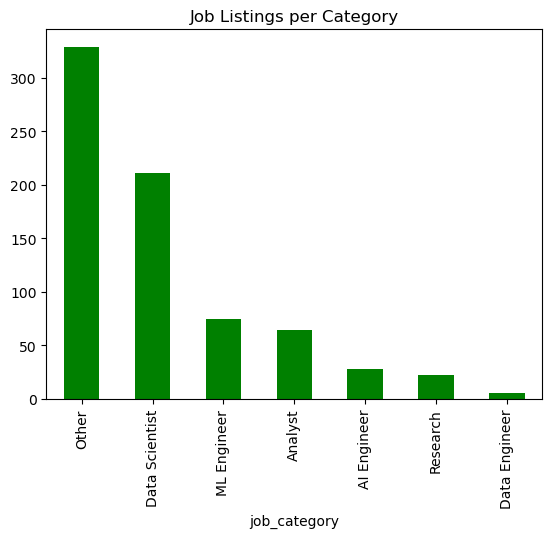

In [42]:
# Vertical bar chart
job_counts.plot.bar(color='green', title='Job Listings per Category')

### Question 2: Which states have the highest number of jobs in the dataset?

In [44]:
# Extract state abbreviation from location
df['state'] = df['location'].str.extract(r', ([A-Z]{2})')

In [45]:
# Count jobs per state
state_counts = df['state'].value_counts().sort_values(ascending=False)
print(state_counts)

state
CA    141
NY     85
VA     49
WA     48
TX     43
MD     27
NC     26
GA     23
MA     23
IL     20
NJ     17
DC     17
MN     14
AZ     10
PA      9
FL      9
OH      9
TN      8
MI      8
CO      7
CT      6
KS      6
IN      5
MO      4
AL      3
RI      3
LA      3
HI      3
WI      2
NM      2
IA      2
NV      2
UT      2
OR      2
SC      2
MS      1
AR      1
KY      1
PR      1
NE      1
ID      1
Name: count, dtype: int64


In [51]:
# Count jobs per state and get top 10
top_states = df['state'].value_counts().head(10)
print(top_states)

state
CA    141
NY     85
VA     49
WA     48
TX     43
MD     27
NC     26
GA     23
MA     23
IL     20
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 States by Number of Jobs'}, xlabel='state'>

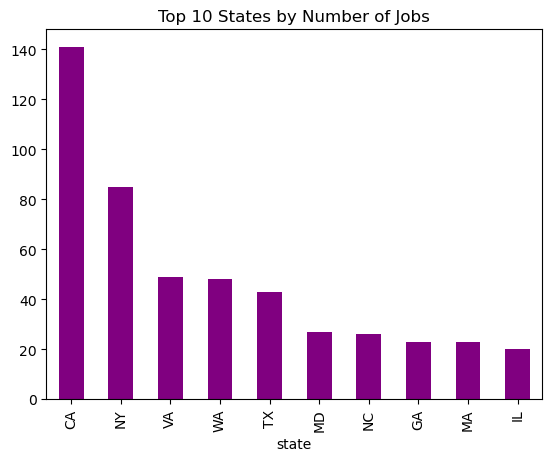

In [52]:
# Vertical bar chart
top_states.plot.bar(color='purple', title='Top 10 States by Number of Jobs')

### Question 3: What is the minimum salary range for Data Scientist positions?

In [53]:
#Filter dataset for Data Scientist jobs
ds_jobs = df[df['job_title'] == 'Data Scientist']

In [56]:
 # Check minimum salaries
print(ds_jobs['salary_annual_usd'].describe())  # summary statistics

count        45.000000
mean     124208.740222
std       27492.605698
min       73500.000000
25%      107000.000000
50%      125250.000000
75%      125250.000000
max      210000.000000
Name: salary_annual_usd, dtype: float64


<Axes: title={'center': 'Distribution of Minimum Salaries for Data Scientist Jobs'}, ylabel='Frequency'>

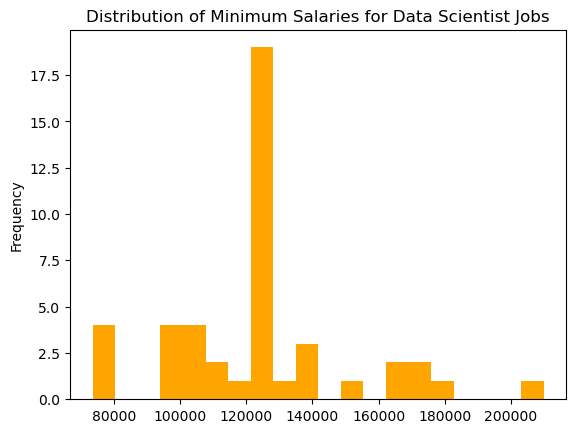

In [58]:
#Distribution plot 
ds_jobs['salary_annual_usd'].plot.hist(bins=20, color='orange', title='Distribution of Minimum Salaries for Data Scientist Jobs')

#### SUMMARY
The minimum salary for Data Scientist jobs in the dataset is 73,500k.

Looking at the distribution of minimum salaries: 

Most jobs have minimum salaries between 107,000k and 125,250k (25th to 75th percentile).

The median salary is 125,250k, which shows that half of the jobs pay at least this amount.

The maximum minimum salary is 210,000k, indicating some high-paying positions.

### Question 4: Do senior roles have significantly higher salaries?

In [69]:
#Group salaries by job level
avg_salary_by_level = df.groupby('level')['salary_annual_usd'].mean()
print("Average annual salary by job level:")
print(avg_salary_by_level)


Average annual salary by job level:
level
Junior          73712.500000
Mid            133410.733333
Senior         137386.196561
Unspecified    129822.992076
Name: salary_annual_usd, dtype: float64


In [63]:
# Count how many rows have 'Unspecified' level
unspecified_count = (df['level'] == 'Unspecified').sum()
print("Number of unspecified job levels:", unspecified_count)

Number of unspecified job levels: 419


In [64]:
# Compare only known levels
avg_salary_by_level_known = df[df['level'] != 'Unspecified'].groupby('level')['salary_annual_usd'].mean()
print(avg_salary_by_level_known)

level
Junior     73712.500000
Mid       133410.733333
Senior    137386.196561
Name: salary_annual_usd, dtype: float64


<Axes: title={'center': 'Average Salary by Job Level (Known Levels Only)'}, xlabel='level'>

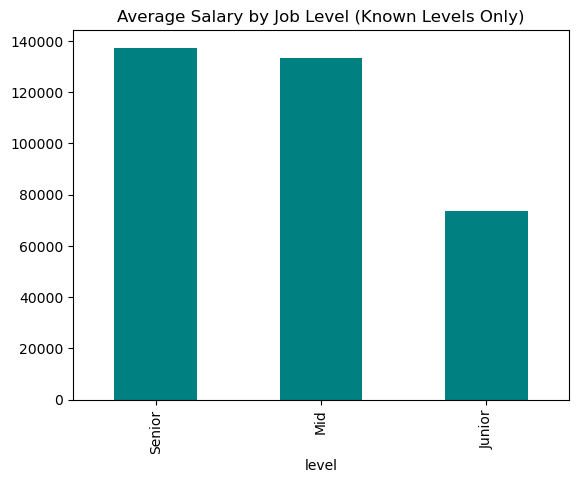

In [67]:
# Vertical bar chart
avg_salary_by_level_known.sort_values(ascending=False).plot.bar(color='teal', title='Average Salary by Job Level (Known Levels Only)')

There are 419 jobs with unspecified levels. These rows were not included in the comparison of Senior, Mid, and Junior salaries, because their level is unknown. Based on salary, some could be Mid or Senior, but this cannot be determined precisely. Senior-level roles have significantly higher average salaries (137,386k) compared to junior roles (73,713k). Mid-level roles also earn more than junior positions, confirming that higher-level positions are paid better in the dataset.

### Question 5: Which companies are main competitors for talent?

In [70]:
#Count number of job listings per company
company_counts = df['company'].value_counts()
print(company_counts.head(10)) 

company
Amazon                                            24
Apple                                             20
Meta                                              20
Amazon.com Services                               15
Google                                            14
Handshake                                         12
Wells Fargo                                       10
JPMorganChase                                     10
Amazon Web Services,                               9
Information Technology Senior Management Forum     8
Name: count, dtype: int64


The top companies with the most AI job listings are Amazon, Apple, Meta, Google, and others, indicating that these firms are the main competitors for talent in the dataset.”

<Axes: title={'center': 'Top 10 Companies by Number of Job Listings'}, xlabel='company'>

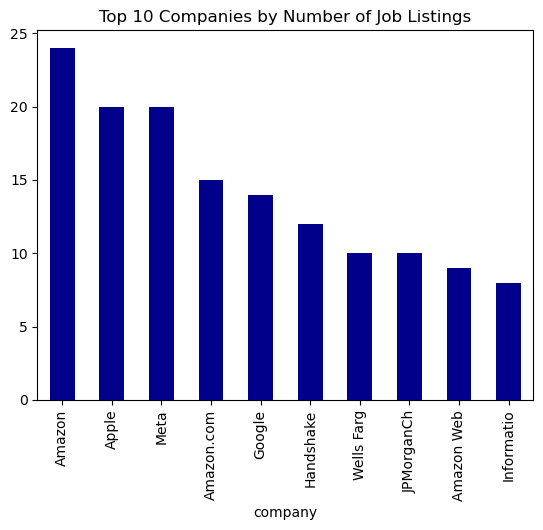

In [76]:
#Vertical bar chart of top 10 companies
company_counts.index = company_counts.index.str[:11]
company_counts.head(10).plot.bar(color='darkblue', title='Top 10 Companies by Number of Job Listings')

### Question 6: What is the average salary offered by each company?

In [84]:
# Calculate average salary by company
avg_salary_by_company = df.groupby('company')['salary_annual_usd'].mean()
# Sort descending to see highest-paying companies
avg_salary_by_company = avg_salary_by_company.sort_values(ascending=True)
print(avg_salary_by_company.tail(10))  # show top 10

company
Intezra,                          210000.0
Aledade                           215000.0
Palo Alto Networks                215000.0
Instacart                         238500.0
Durlston Partners                 240000.0
Bosch Group                       240000.0
Airbnb                            244000.0
Rockefeller Capital Management    250000.0
Blue River Technology             312000.0
OpenAI                            325000.0
Name: salary_annual_usd, dtype: float64


In [85]:
#Take top 10 highest-paying companies
top10_avg_salary = avg_salary_by_company.tail(10)

<Axes: title={'center': 'Top 10 Companies by Average Salary'}, ylabel='company'>

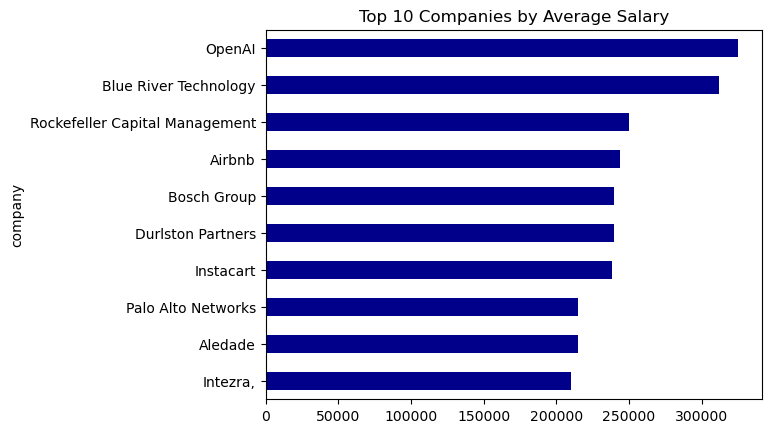

In [89]:
# Plot horizontal bar chart
top10_avg_salary.plot.barh(color='darkblue', title='Top 10 Companies by Average Salary')

### Question 7: Based on the dataset, which skills are most important in hiring?

In [90]:
# List of skill columns
skills = ['skill_1','skill_2','skill_3','skill_4','skill_5',
          'skill_6','skill_7','skill_8','skill_9','skill_10']

In [128]:
# Combine all skills and count frequency
skill_counts = df[skills].stack().value_counts()

# Show top 10 skills
print(skill_counts.head(10))

Not specified       3291
python               493
machine learning     466
ml                   355
sql                  304
r                    234
aws                  177
pytorch              172
tensorflow           156
deep learning        141
Name: count, dtype: int64


In [141]:
# Remove 'Not specified'
skill_counts_filtered = skill_counts[skill_counts.index != 'Not specified'].copy()

In [142]:
# Combine ML variations into one
ml_total = (
    skill_counts_filtered.get('ml', 0) +
    skill_counts_filtered.get('Machine Learning', 0) +
    skill_counts_filtered.get('machine learning', 0)
)
skill_counts_filtered['Machine Learning'] = ml_total
# Drop old separate entries
skill_counts_filtered = skill_counts_filtered.drop(['ml','machine learning'], errors='ignore')
#Show top 10 skills
top_skills = skill_counts_filtered.sort_values(ascending=False).head(10)
print(top_skills)

Machine Learning    821
python              493
sql                 304
r                   234
aws                 177
pytorch             172
tensorflow          156
deep learning       141
llm                 112
azure               100
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Most Important Skills (Combined ML)'}>

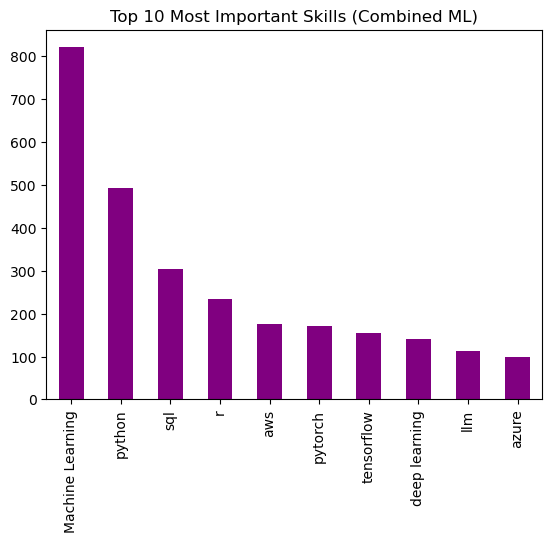

In [143]:
# Plot horizontal bar chart
top_skills.plot.bar(color='purple', title='Top 10 Most Important Skills (Combined ML)')

The most important skills in AI jobs are Machine Learning, Python, SQL, R, AWS, PyTorch, TensorFlow, Deep Learning, LLM, and Azure. Machine Learning appears in 821 job listings, making it the most frequently required skill.

### Question 8: Which skills are associated with the highest salaries?

In [155]:
avg_salaries = []
for col in skills:
    avg_salaries.append(df.groupby(col)['salary_annual_usd'].mean())
    all_avg_salaries = pd.concat(avg_salaries)
# Remove 'Not specified'
all_avg_salaries = all_avg_salaries[all_avg_salaries.index != 'Not specified']

# Convert to DataFrame for grouping
df_skills_salary = all_avg_salaries.reset_index()
df_skills_salary.columns = ['skill', 'salary']

# Group by skill and take maximum salary
df_skills_salary_max = df_skills_salary.groupby('skill')['salary'].max()

# Get top 10 highest-paying skills
top_salary_skills = df_skills_salary_max.sort_values(ascending=False).head(10)
print(top_salary_skills)

skill
kafka                 238000.000000
docker                210000.000000
computer vision       207433.333333
openai                201550.000000
prompt engineering    197600.000000
rag                   192000.000000
mongodb               188885.000000
dbt                   187200.000000
anthropic             187200.000000
bigquery              187200.000000
Name: salary, dtype: float64


In [156]:
all_avg_salaries = all_avg_salaries.groupby(all_avg_salaries.index).mean()

# Step 5: Get top 10 highest-paying skills
top_salary_skills = all_avg_salaries.sort_values(ascending=False).head(10)
print(top_salary_skills)


kubeflow              166723.000000
rag                   149240.247917
computer vision       146405.994121
athena                145876.400000
prompt engineering    145602.565476
mongodb               144055.833333
kubernetes            141688.400682
llm                   141267.563840
docker                141027.883472
redshift              139046.500000
Name: salary_annual_usd, dtype: float64


Skills like Kafka, Docker, and Computer Vision appear among the top-paying skills. The maximum salaries show the peak earning potential, while the average salaries give a more typical salary associated with each skill.

<Axes: title={'center': 'Top 10 Skills Associated with Highest Average Salaries'}>

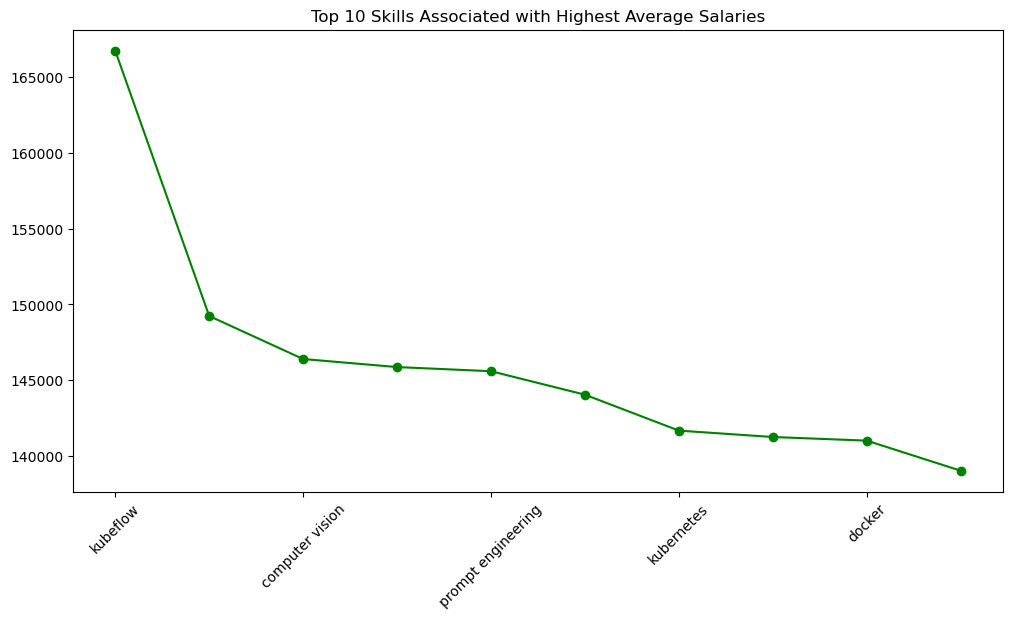

In [161]:
# Plot as a line chart
top_salary_skills.plot(
    kind='line',
    marker='o',
    color='green',
    title='Top 10 Skills Associated with Highest Average Salaries',
    figsize=(12,6),
    rot=45  # rotate x-axis labels
)


### Question 9: What is the salary difference across states?

In [178]:
# Step 1: Extract state abbreviation from 'location'
df['state'] = df['location'].str.extract(r', ([A-Z]{2})')

# Step 2: Calculate average salary per state and sort descending
avg_salary_by_state = df.groupby('state')['salary_annual_usd'].mean().sort_values(ascending=False)
print(avg_salary_by_state)

state
CA    154300.378794
NY    144829.642353
WA    143444.283333
NJ    134026.769412
MD    133805.175185
CT    129908.333333
GA    128947.391304
MO    126314.600000
TN    125943.750000
PR    125250.000000
NM    125250.000000
IA    125250.000000
ID    125250.000000
AL    125250.000000
MA    123617.130435
PA    123527.777778
VA    121753.326531
TX    121263.544186
AZ    120233.592000
MI    119562.500000
WI    118625.000000
OR    117625.000000
MN    117379.971429
IN    116701.574000
HI    116500.000000
IL    116001.183000
DC    115844.882353
NC    115077.692308
NV    115066.685000
UT    110575.000000
AR    110000.000000
LA    109933.333333
OH    109771.555556
KS    107791.666667
CO    107772.825714
FL    106768.888889
RI    104645.000000
KY    100152.000000
NE     99000.000000
SC     88625.000000
MS     80000.000000
Name: salary_annual_usd, dtype: float64


In [179]:
# Group by state and calculate statistics
salary_stats_by_state = df.groupby('state')['salary_annual_usd'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    std='std'
).sort_values(by='mean', ascending=False)

# Display the table
print(salary_stats_by_state)

       count           mean      median        min       max           q1  \
state                                                                       
CA       141  154300.378794  143900.000   69000.00  325000.0  125250.0000   
NY        85  144829.642353  141000.000   55000.00  250000.0  117000.0000   
WA        48  143444.283333  139907.000   86300.00  264160.0  120725.0000   
NJ        17  134026.769412  126400.000   85000.00  175000.0  120500.0000   
MD        27  133805.175185  125250.000   60987.00  215000.0  123025.0000   
CT         6  129908.333333  125250.000  125250.00  153200.0  125250.0000   
GA        23  128947.391304  125250.000  105740.00  176800.0  125250.0000   
MO         4  126314.600000  126314.600  125250.00  127379.2  125250.0000   
TN         8  125943.750000  125250.000  125250.00  130800.0  125250.0000   
PR         1  125250.000000  125250.000  125250.00  125250.0  125250.0000   
NM         2  125250.000000  125250.000  125250.00  125250.0  125250.0000   

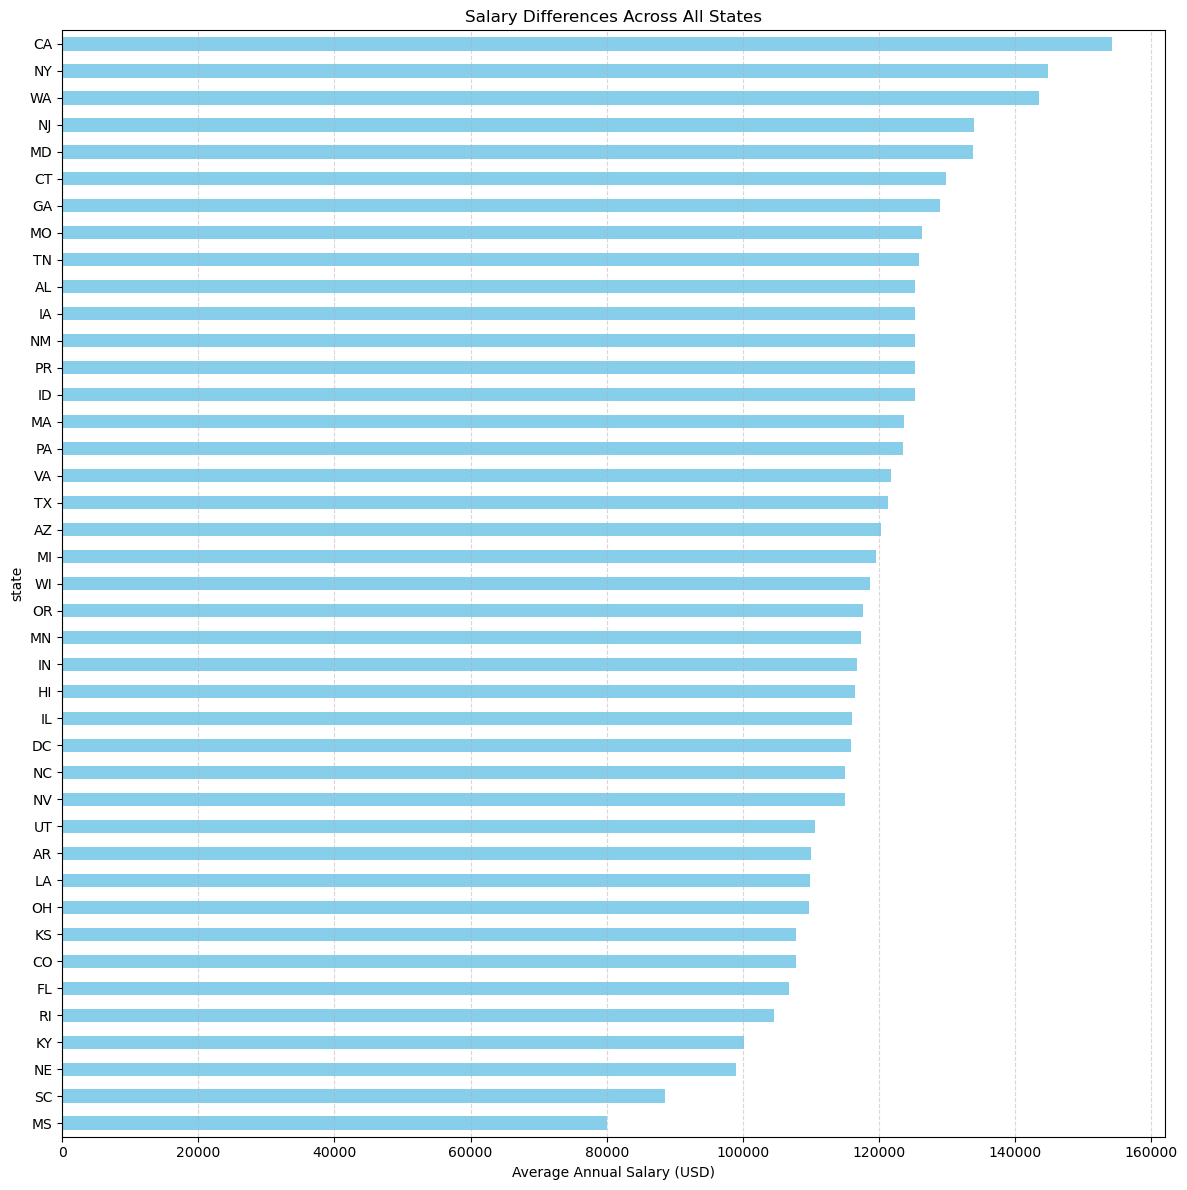

In [180]:
plt.figure(figsize=(12,12))
# Horizontal bar chart of mean salaries
salary_stats_by_state['mean'].sort_values().plot.barh(color='skyblue')
plt.xlabel('Average Annual Salary (USD)')
plt.title('Salary Differences Across All States')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

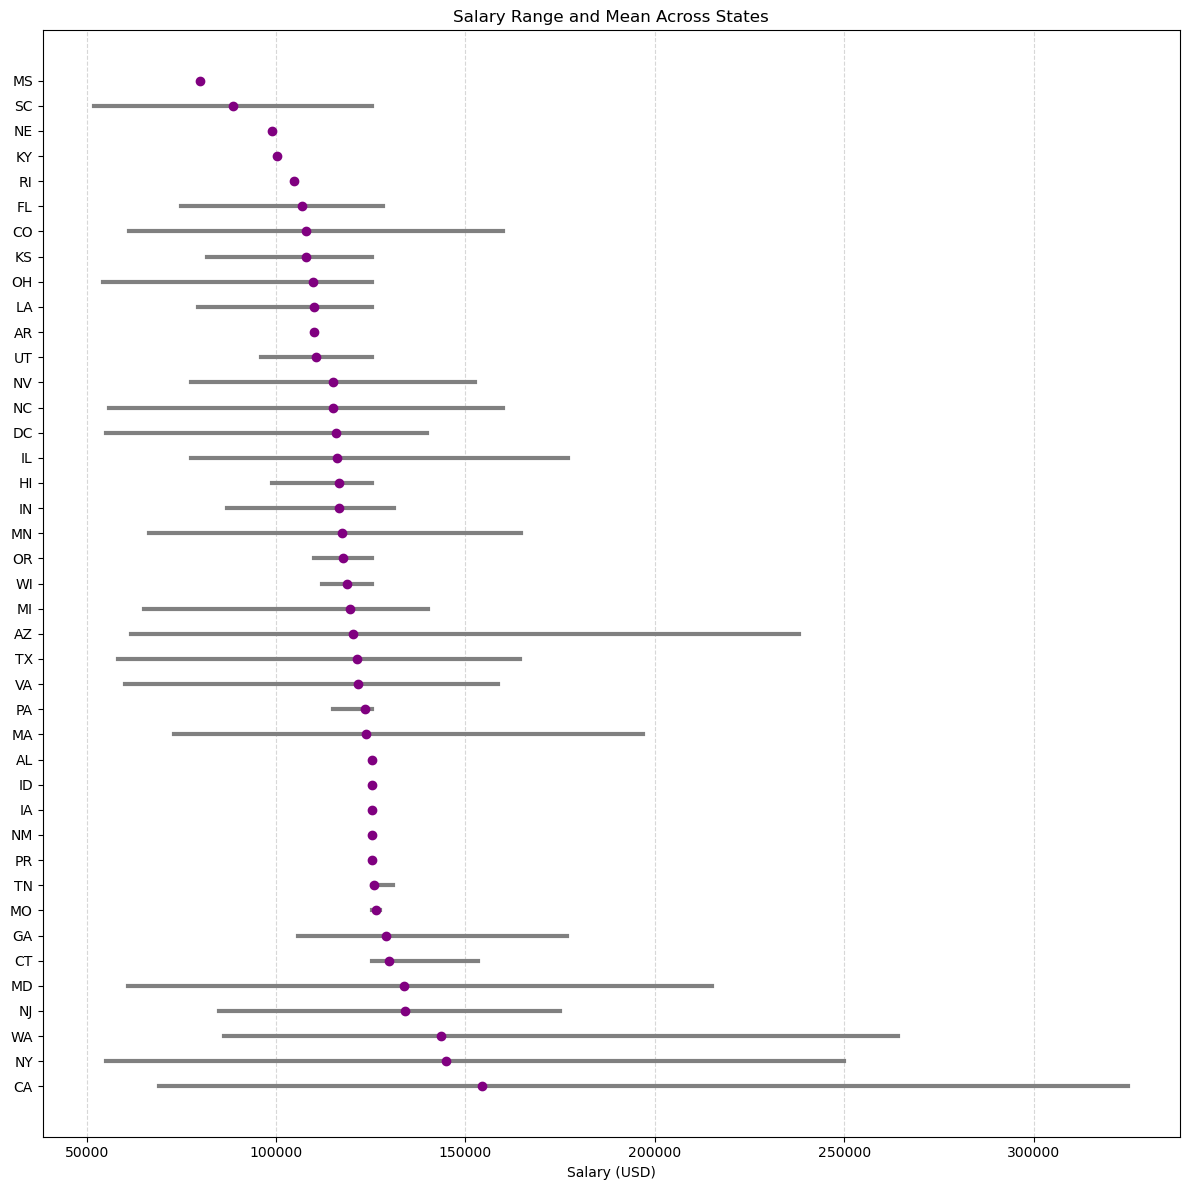

In [181]:
plt.figure(figsize=(12,12))
for i, state in enumerate(salary_stats_by_state.index):
    plt.plot([salary_stats_by_state.loc[state,'min'], salary_stats_by_state.loc[state,'max']],
             [i, i], color='gray', linewidth=3)  # line from min to max
    plt.plot(salary_stats_by_state.loc[state,'mean'], i, 'o', color='purple')  # mean marker

plt.yticks(range(len(salary_stats_by_state)), salary_stats_by_state.index)
plt.xlabel('Salary (USD)')
plt.title('Salary Range and Mean Across States')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The plots show the variation in salaries across all states. States like CA, NY, and WA have the highest salaries, while MS, SC, and KY have the lowest. The min–max ranges indicate that even within a state, salaries can vary significantly, highlighting regional differences and the spread of compensation for AI-related jobs.

### Question 10: Are  salary offerings competitive relative to company ratings?

In [182]:
# Group by company rating and calculate mean salary
rating_salary = df.groupby('rating')['salary_annual_usd'].mean().sort_index()
print(rating_salary)

rating
0.0    132799.046100
1.0    117550.000000
1.2    125000.000000
2.3    137625.000000
2.4    125250.000000
2.6    125250.000000
2.7    164000.000000
2.8    101695.200000
2.9    119759.967500
3.0    112904.615385
3.1    157497.090000
3.2    120943.941176
3.3    129196.445312
3.4    134243.868293
3.5    135537.442254
3.6    120346.693276
3.7    125345.852667
3.8    122487.927273
3.9    127255.803030
4.0    146447.733333
4.1    140137.805000
4.2    143110.252381
4.3    153220.454545
4.4    125250.000000
4.5    166150.000000
4.6    125100.000000
4.7    103914.993333
4.8    115070.000000
5.0    128619.520000
Name: salary_annual_usd, dtype: float64


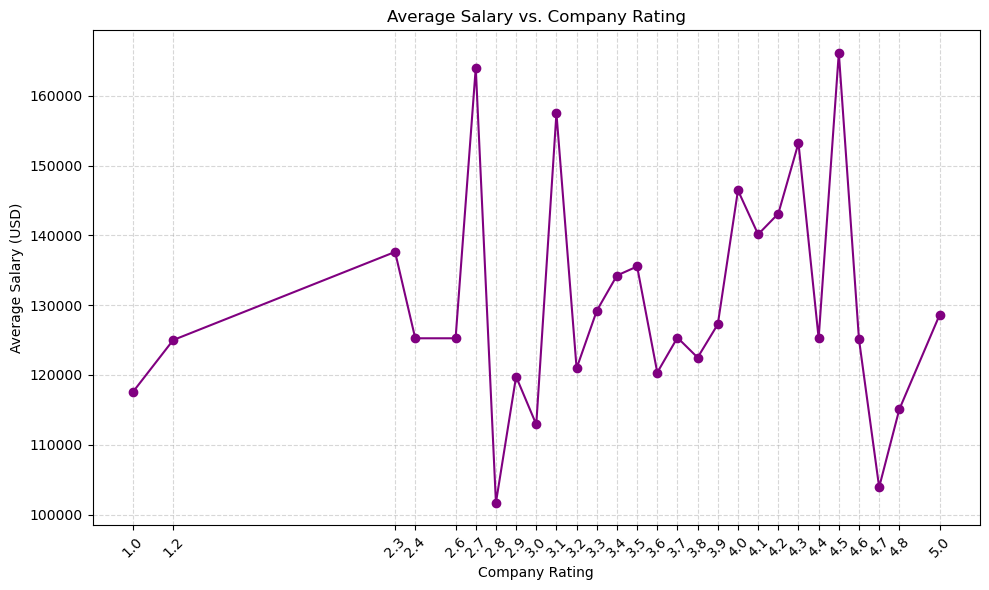

In [187]:
rating_salary_clean = rating_salary[rating_salary.index > 0]
plt.figure(figsize=(10,6))
rating_salary_clean.plot(kind='line', marker='o', color='purple')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary vs. Company Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rating_salary_clean.index, rotation=45)
plt.tight_layout()
plt.show()

In [188]:
# Correlation coefficient between rating and salary
corr = df[df['rating']>0].groupby('rating')['salary_annual_usd'].mean().corr(
    df[df['rating']>0].groupby('rating')['rating'].first()
)
print(f"Correlation between rating and average salary: {corr:.2f}")

Correlation between rating and average salary: 0.12


* SUMMARY :
The correlation between company ratings and average salaries is 0.12, indicating a very weak positive relationship. While higher-rated companies tend to offer slightly higher salaries on average, there are many exceptions. This suggests that company rating alone is not a strong predictor of salary, and other factors such as job level, location, and company size may influence compensation more significantly.

### Question 11: What is the salary spread within each experience level?

In [189]:
df['level'].value_counts() ##This shows how many jobs are at each experience level, including any "Unspecified".

level
Unspecified    419
Senior         285
Mid             27
Junior           4
Name: count, dtype: int64

In [190]:
salary_by_level = df.groupby('level')['salary_annual_usd'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    std='std'
)
print(salary_by_level)

             count           mean    median      min       max        q1  \
level                                                                      
Junior           4   73712.500000   58800.0  52000.0  125250.0   54400.0   
Mid             27  133410.733333  129300.0  75000.0  197000.0  125250.0   
Senior         285  137386.196561  125250.0  54300.0  312000.0  125000.0   
Unspecified    419  129822.992076  125250.0  56000.0  325000.0  114400.0   

                   q3           std  
level                                
Junior        78112.5  34632.508211  
Mid          138500.0  26580.507532  
Senior       151300.0  35091.043903  
Unspecified  142182.0  35992.203904  


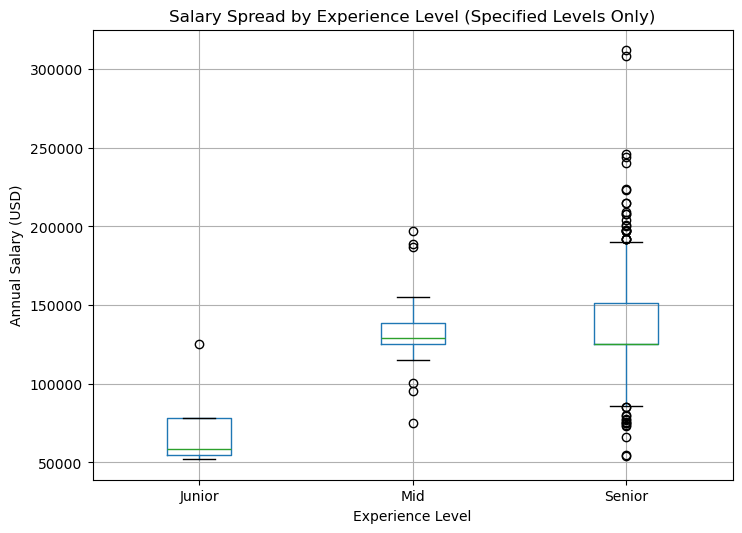

In [194]:
# Filter out Unspecified levels
df_levels = df[df['level'] != 'Unspecified']

# Boxplot of salary spread by level
df_levels.boxplot(column='salary_annual_usd', by='level', figsize=(8,6))
plt.title('Salary Spread by Experience Level (Specified Levels Only)')
plt.suptitle('')  # remove automatic subtitle
plt.xlabel('Experience Level')
plt.ylabel('Annual Salary (USD)')
plt.show()

Salary spread increases with experience level. Senior roles have the highest salaries on average, but also the largest range, indicating some very high-paying positions as outliers. Mid-level salaries are slightly lower with less variability,are generally in the middle range, with a few outliers slightly below or above the main distribution, while Junior roles have the lowest and most compact salary range.

### Question 12: How do remote-friendly companies compare in terms of salaries?

In [196]:
print(df.columns)

Index(['job_title', 'company', 'location', 'rating', 'salary_raw',
       'salary_min', 'salary_max', 'salary_period', 'level', 'is_manager',
       'description', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5',
       'skill_6', 'skill_7', 'skill_8', 'skill_9', 'skill_10',
       'annual_salary_usd_min', 'annual_salary_usd_max', 'job_category',
       'company_industry', 'salary_annual_usd', 'state'],
      dtype='object')


In [197]:
df['description'].head(10)

0    Note: By applying to this position you will ha...
1    This is where you save and sustain lives\n\nAt...
2    Redmond, WA • + 2 more•Full Time\nMessenger\nM...
3    Bellevue, WA • Full Time\nMeta\nSoftware Engin...
4    Job ID: 694362BR\nDate posted: May. 22, 2025\n...
5    Note: By applying to this position you will ha...
6    JOB DESCRIPTION\n\nLeverage your technical exp...
7    Universal Ads, a part of Comcast, enables any ...
8    Riverside Overview: Riverside Research is an i...
9    Why Mayo Clinic\n\nMayo Clinic is top-ranked i...
Name: description, dtype: object

In [198]:
# Create a new boolean column 'is_remote'
df['is_remote'] = df['description'].str.contains('remote', case=False, na=False)

In [199]:
# Count remote vs non-remote jobs
print(df['is_remote'].value_counts())

is_remote
False    567
True     168
Name: count, dtype: int64


In [200]:
# Salary statistics by remote status
salary_remote = df.groupby('is_remote')['salary_annual_usd'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
)
print(salary_remote)

           count           mean    median      min       max
is_remote                                                   
False        567  134283.832892  125250.0  52000.0  325000.0
True         168  126838.727679  125250.0  55200.0  308000.0


Remote-friendly positions have slightly higher average salaries compared to non-remote roles, but the salary spread is wider, indicating some high-paying remote opportunities.

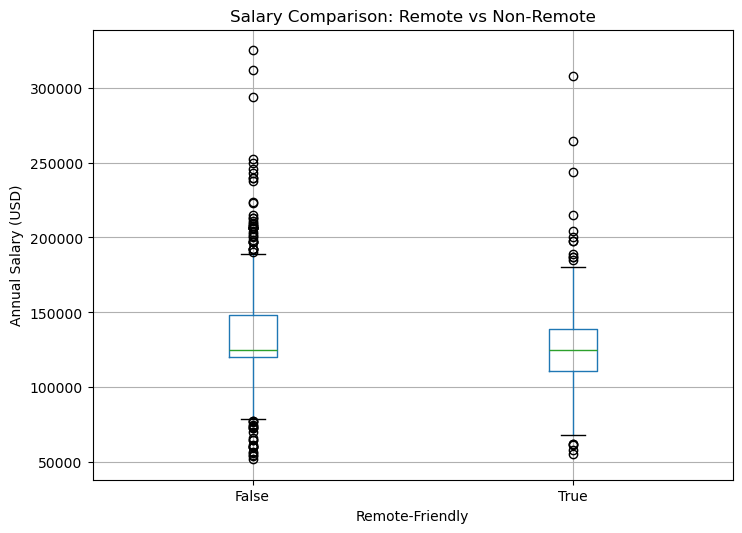

In [202]:
# Boxplot of salaries by remote status
df.boxplot(column='salary_annual_usd', by='is_remote', figsize=(8,6))
plt.title('Salary Comparison: Remote vs Non-Remote')
plt.suptitle('')  # remove the automatic subtitle
plt.xlabel('Remote-Friendly')
plt.ylabel('Annual Salary (USD)')
plt.show()